In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 로드
ti = sns.load_dataset('titanic')

In [9]:
# ti 데이터셋의 행과 열의 크기 확인
print(ti.shape)

# ti 데이터셋의 맨 앞 2개의 행, 맨 뒤 2개의 행을 한번에 보기 (display 함수 찾아서 사용해볼 것)
display(
    ti.head(2),
    ti.tail(2))

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [11]:
# ti의 컬럼명들 확인 & 출력
print(ti.columns)
# ti의 행 index 확인 & 출력
print(ti.index)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
RangeIndex(start=0, stop=891, step=1)


In [12]:
# ti의 요약정보(non-null data 개수 & data type) 확인 
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [14]:
# 각 컬럼별로 몇개의 NaN 값이 존재하는지 확인 (isnull & sum 사용)
ti.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
# ti 변수들 중 numeric(숫자형) 변수들의 기초통계량 파악
ti.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---

In [18]:
# 간단하게 survived의 각 변수별 데이터의 수 확인. 산 사람(1)은 몇명이고 죽은 사람(0)은 몇명인가
ti.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

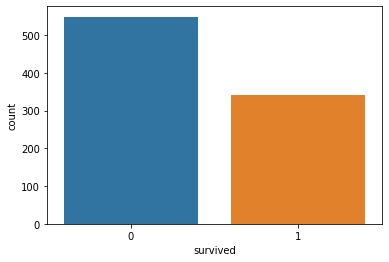

In [19]:
# survived별 사람의 수 count하여 시각화 (seaborn 사용)
import seaborn as sns

sns.countplot(ti.survived)

In [20]:
# deck 변수의 unique한 데이터 확인 및 출력
ti.deck.unique()

[NaN, C, E, G, D, A, B, F]
Categories (7, object): [C, E, G, D, A, B, F]

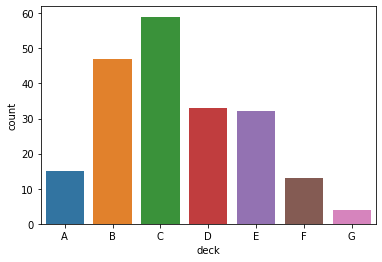

In [21]:
# deck별 사람의 수 count하여 시각화 (seaborn 사용)
sns.countplot(ti.deck)

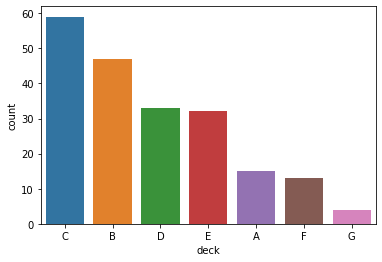

In [30]:
# 사람이 많은 deck 순서대로 countplot의 x축 순서 정렬 (order 인자를 사용해보세요! 힌트: order 인자로 value_counts의 index를 사용하세요!)
#order = list(ti.deck.value_counts().index)
order = ti.deck.value_counts().index
sns.countplot(ti.deck, order=order)

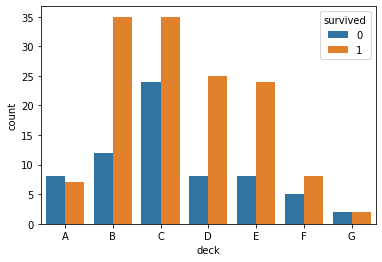

In [28]:
# deck(x)변수별로 survived(hue)한 사람의 수를 count하여 시각화 (seaborn 사용) 
sns.countplot(x = "deck", hue="survived", data=ti)

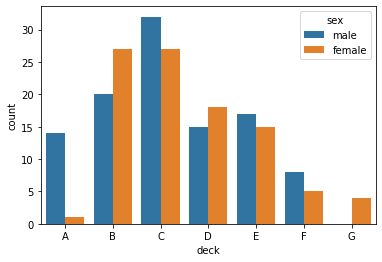

In [37]:
sns.countplot(x = "deck", hue="sex", data=ti)

In [36]:
# ti 데이터프레임에서 deck 변수 값이 NaN이 아닌 데이터들만 뽑아서 deck_exist 라는 변수에 할당 (notnull 사용)
deck_exist = ti[ti.deck.notna()]
# deck_exist의 행과 열의 개수 확인
print(deck_exist.shape)
# deck_exist의 맨 앞 3개의 행, 맨 뒤 3개의 행 한번에 확인하기 (display 사용)
display(
    deck_exist.head(3),
    deck_exist.tail(3),
)

(203, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


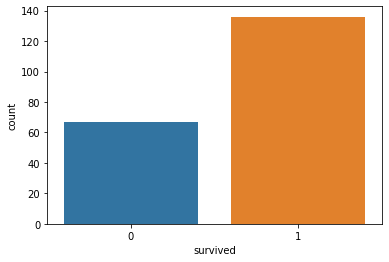

In [40]:
# deck_exist 데이터에서 survived별 사람의 수 count하여 시각화
sns.countplot(deck_exist.survived)

(688, 15)


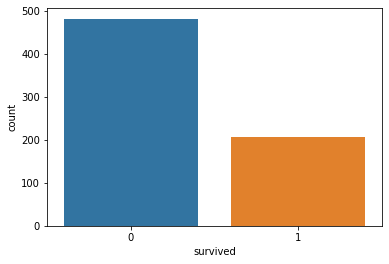

In [41]:
# ti 데이터프레임에서 deck 변수 값이 NaN인 데이터들만 뽑아서 deck_not 라는 변수에 할당 
deck_not = deck_exist = ti[ti.deck.isna()]
# deck_not의 행과 열의 개수 확인
print(deck_not.shape)
# deck_not 데이터에서 survived별 사람의 수 count하여 시각화
sns.countplot(deck_not.survived)

In [ ]:
ti.drop(columns)